In [1]:
from pathlib import Path
import json
import pandas as pd
import numpy as np
import re
import ast
import pandas as pd

# Classified Chat Question

In [4]:
cpc = pd.read_csv("/dccstor/gma2/mehuldamani/search-and-learn/cluster-questions/chat_questions_classified_raw_3.csv", index_col=0)

In [5]:
cpc.shape

(909, 4)

In [6]:
cpc.head()

,question,topic,response_style,cognitive_effort
question_id,,,,
0,What's the best first move in tic-tac-toe?,Role-Playing Games,Informational,Medium-effort synthesis
1,"What is ""The Bloody Lip Bar and Grill""?",Movie Reviews and Discussions,Informational,Low-effort retrieval
2,could you tell a funny and whimsical story abo...,Poetry Writing & Styles,Creative Generation,High-effort reasoning/creativity
3,"I have frozen cod filets, tomatoes, lemons, be...",Cooking and Recipes,Instructional,Medium-effort synthesis
4,The following is a command that the user is ab...,Web Development Essentials,Problem-Solving / Technical,Low-effort retrieval


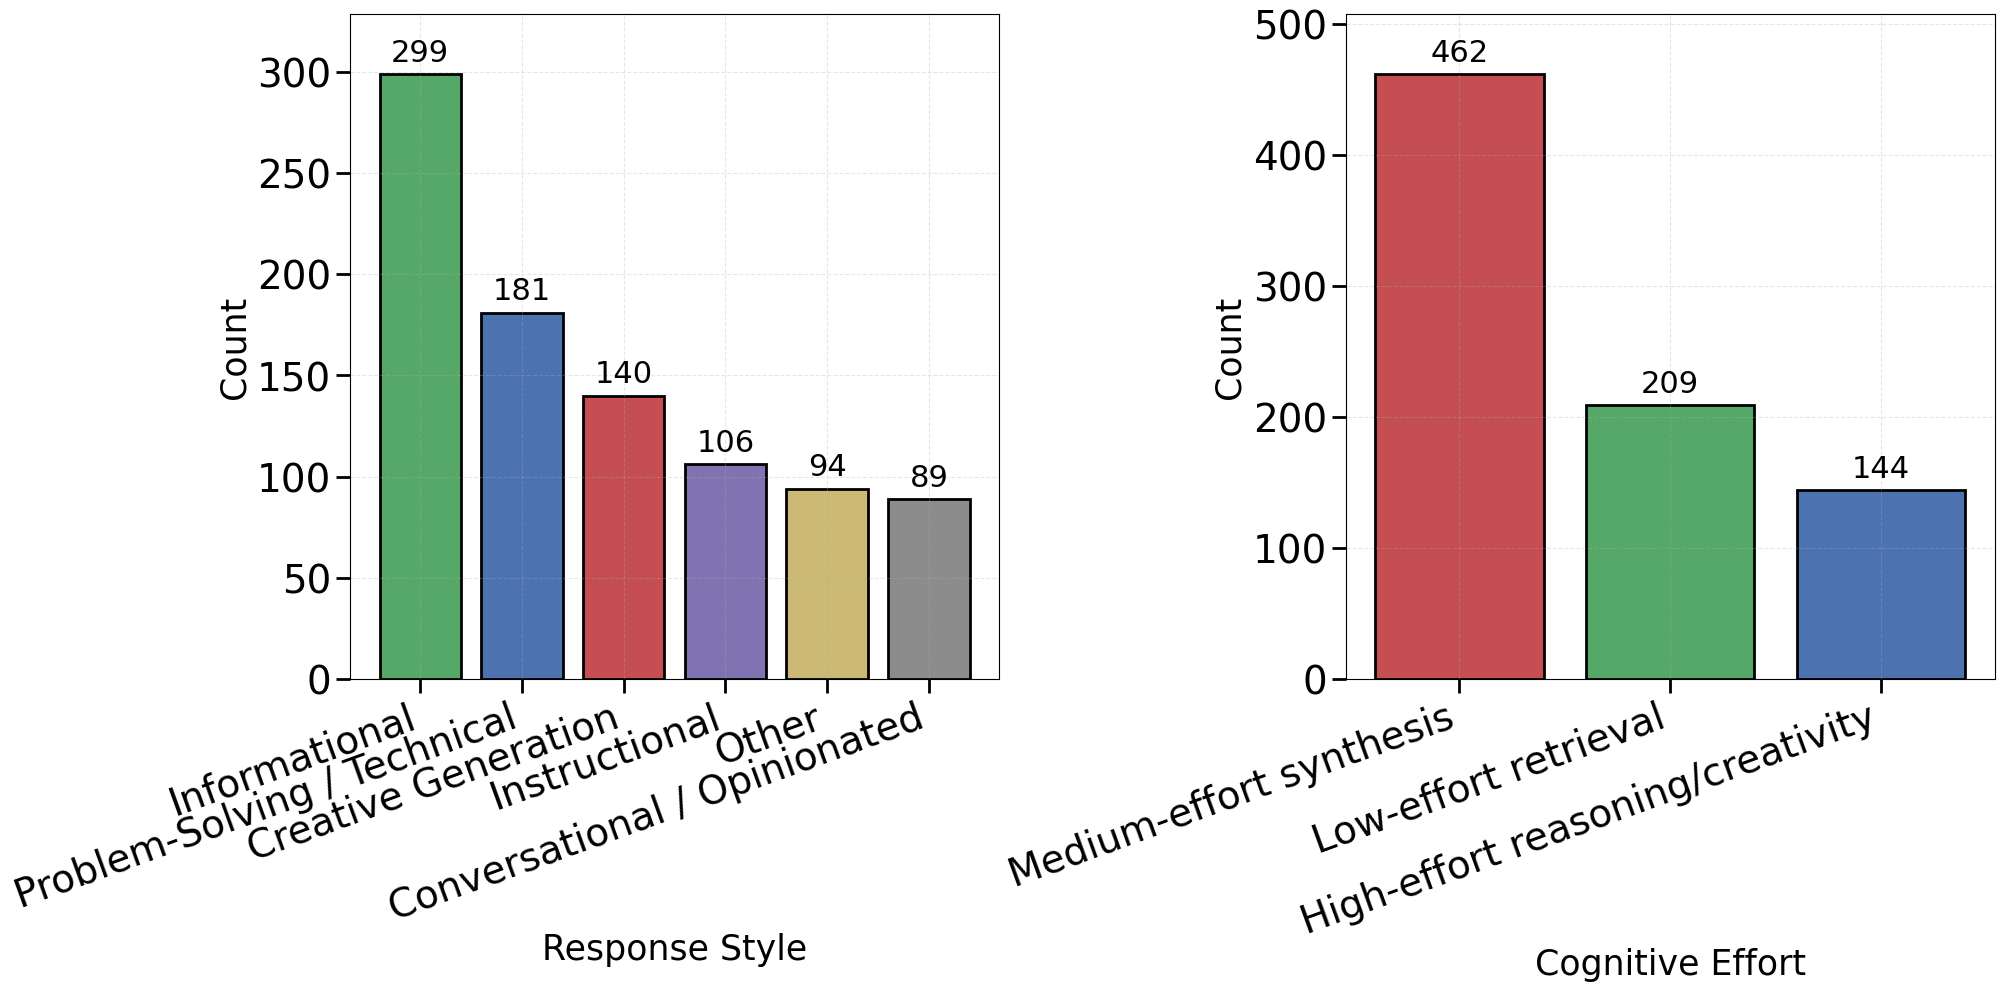

In [10]:
# --- Plot Distributions of Response Style (Top 5, rest as 'Other') and Cognitive Effort ---

import matplotlib.pyplot as plt

# Set font sizes to match the referenced figure
label_fontsize = 25
tick_fontsize = 28
title_fontsize = 35
annot_fontsize = 22
legend_fontsize = 25

# Custom color palettes for each attribute (expand as needed)
response_style_colors = [
    "#55A868", "#4C72B0", "#C44E52", "#8172B2", "#CCB974", "#8C8C8C"  # last color for 'Other'
]
cognitive_effort_colors = [
    "#C44E52", "#55A868", "#4C72B0", "#8172B2", "#CCB974", "#64B5CD", "#8C8C8C"
]

# Group response styles: top 5 as themselves, rest as 'Other'
top5_response_styles = cpc['response_style'].value_counts().head(5).index.tolist()
cpc_response_style_grouped = cpc['response_style'].apply(lambda x: x if x in top5_response_styles else 'Other')
response_style_counts = cpc_response_style_grouped.value_counts()
response_style_labels = response_style_counts.index.tolist()
response_style_values = response_style_counts.values

# Prepare counts and labels for cognitive effort (all)
cognitive_effort_counts = cpc['cognitive_effort'].value_counts()
cognitive_effort_labels = cognitive_effort_counts.index.tolist()
cognitive_effort_values = cognitive_effort_counts.values

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

# --- Response Style Distribution (Top 5 + Other) ---
ax = axes[0]
bars = ax.bar(
    range(len(response_style_labels)),
    response_style_values,
    color=response_style_colors[:len(response_style_labels)],
    edgecolor='black',
    linewidth=2
)
ax.set_xlabel('Response Style', fontsize=label_fontsize)
ax.set_ylabel('Count', fontsize=label_fontsize)
ax.set_xticks(range(len(response_style_labels)))
ax.set_xticklabels(response_style_labels, fontsize=tick_fontsize, rotation=20, ha="right")
ax.set_ylim(0, max(response_style_values) * 1.10)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize, length=10, width=2)
ax.tick_params(axis='both', which='minor', labelsize=20, length=6, width=1.5)
ax.grid(True, which='both', linestyle='--', alpha=0.3)
for bar, value in zip(bars, response_style_values):
    ax.annotate(f"{value}", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=annot_fontsize)
# ax.set_title('Distribution of Response Style (Top 5 + Other)', fontsize=title_fontsize, pad=20)

# --- Cognitive Effort Distribution ---
ax = axes[1]
bars = ax.bar(
    range(len(cognitive_effort_labels)),
    cognitive_effort_values,
    color=cognitive_effort_colors[:len(cognitive_effort_labels)],
    edgecolor='black',
    linewidth=2
)
ax.set_xlabel('Cognitive Effort', fontsize=label_fontsize)
ax.set_ylabel('Count', fontsize=label_fontsize)
ax.set_xticks(range(len(cognitive_effort_labels)))
ax.set_xticklabels(cognitive_effort_labels, fontsize=tick_fontsize, rotation=20, ha="right")
ax.set_ylim(0, max(cognitive_effort_values) * 1.10)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize, length=10, width=2)
ax.tick_params(axis='both', which='minor', labelsize=20, length=6, width=1.5)
ax.grid(True, which='both', linestyle='--', alpha=0.3)
for bar, value in zip(bars, cognitive_effort_values):
    ax.annotate(f"{value}", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=annot_fontsize)
# ax.set_title('Distribution of Cognitive Effort', fontsize=title_fontsize, pad=20)

plt.tight_layout()
plt.show()

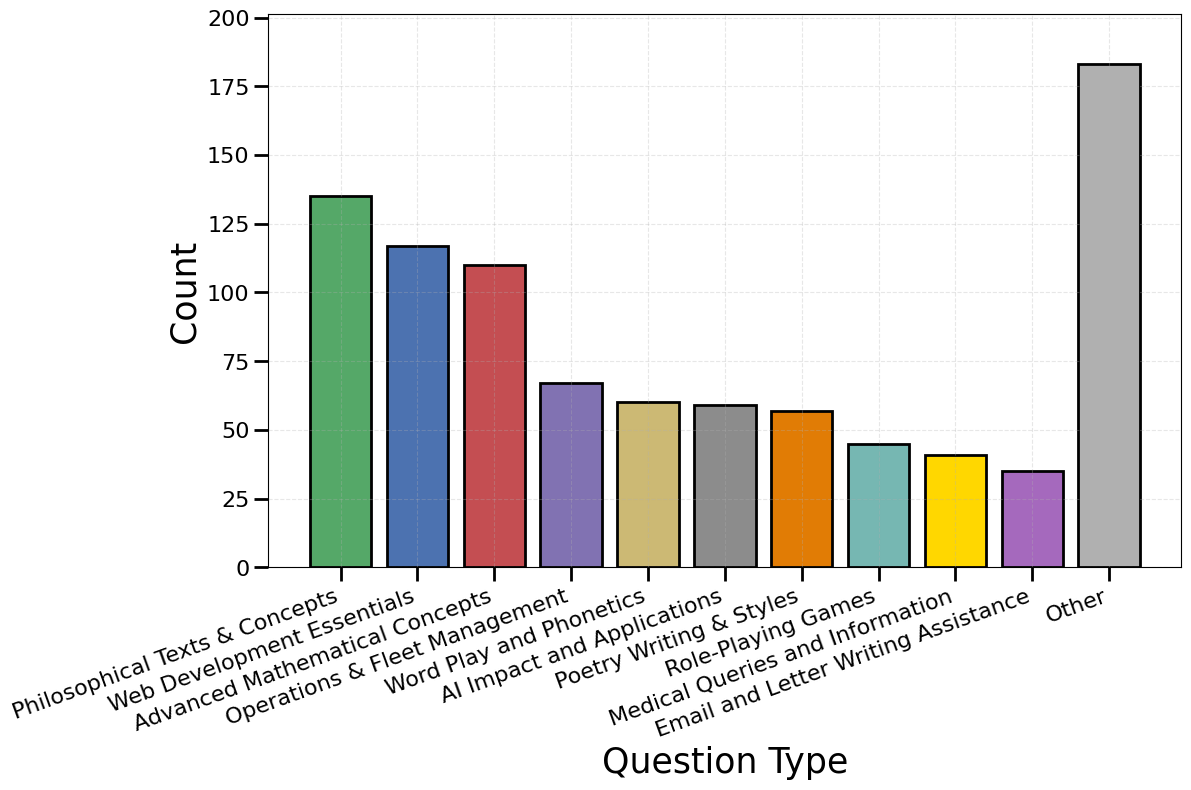

In [17]:
# --- Plot Distribution of Question Type (Top 10, rest as 'Other', "Other" always rightmost) ---

import matplotlib.pyplot as plt

# Set font sizes for clarity
label_fontsize = 25
tick_fontsize = 16  # Reduced x-axis text size as requested
title_fontsize = 35
annot_fontsize = 22

# Custom color palette (expand if needed)
question_type_colors = [
    "#55A868", "#4C72B0", "#C44E52", "#8172B2", "#CCB974", "#8C8C8C",
    "#E17C05", "#76B7B2", "#FFD700", "#A569BD", "#B0B0B0"  # last color for 'Other'
]

# Group question types: top 10 as themselves, rest as 'Other'
top10_question_types = cpc['topic'].value_counts().head(10).index.tolist()
cpc_question_type_grouped = cpc['topic'].apply(lambda x: x if x in top10_question_types else 'Other')
question_type_counts = cpc_question_type_grouped.value_counts()

# Ensure "Other" is always the last label
if "Other" in question_type_counts.index:
    # Remove "Other" and append at the end
    question_type_counts_no_other = question_type_counts.drop("Other")
    question_type_labels = question_type_counts_no_other.index.tolist() + ["Other"]
    question_type_values = list(question_type_counts_no_other.values) + [question_type_counts["Other"]]
else:
    question_type_labels = question_type_counts.index.tolist()
    question_type_values = question_type_counts.values

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.bar(
    range(len(question_type_labels)),
    question_type_values,
    color=question_type_colors[:len(question_type_labels)],
    edgecolor='black',
    linewidth=2
)
ax.set_xlabel('Question Type', fontsize=label_fontsize)
ax.set_ylabel('Count', fontsize=label_fontsize)
ax.set_xticks(range(len(question_type_labels)))
ax.set_xticklabels(question_type_labels, fontsize=tick_fontsize, rotation=20, ha="right")
ax.set_ylim(0, max(question_type_values) * 1.10)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize, length=10, width=2)
ax.tick_params(axis='both', which='minor', labelsize=20, length=6, width=1.5)
ax.grid(True, which='both', linestyle='--', alpha=0.3)
# for bar, value in zip(bars, question_type_values):
#     ax.annotate(f"{value}", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
#                 xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=annot_fontsize)
# ax.set_title('Distribution of Question Type (Top 10 + Other)', fontsize=title_fontsize, pad=20)

plt.tight_layout()
plt.show()

In [ ]:
# continued from router-predcosts.ipynb
hybrid_router = compute_max_utility_pred(df_test, lambda_=1e-5, method="oracle", costa="token_count", costb="time", fixed_lambda=1e-2)

In [19]:
print("Rows with NaN for 'topic':", cpc['topic'].isna().sum())
print("Rows with NaN for 'response_style':", cpc['response_style'].isna().sum())
print("Rows with NaN for 'cognitive_effort':", cpc['cognitive_effort'].isna().sum())

Rows with NaN for 'topic': 29
Rows with NaN for 'response_style': 50
Rows with NaN for 'cognitive_effort': 78


In [20]:
chat_prompts_classified_filtered = cpc.dropna(subset=['topic', 'response_style', 'cognitive_effort'])

In [21]:
chat_prompts_classified_filtered.shape

(792, 4)

In [22]:
chat_prompts_classified_filtered['topic'].unique(), chat_prompts_classified_filtered['response_style'].unique(), chat_prompts_classified_filtered['cognitive_effort'].unique()

(array(['Philosophical Texts & Concepts', 'Operations & Fleet Management',
        'Movie Reviews and Discussions', 'Role-Playing Games',
        'AI Impact and Applications', 'Original Joke Requests',
        'Web Development Essentials', 'Poetry Writing & Styles',
        'Cooking and Recipes', 'Advanced Mathematical Concepts',
        'Word Play and Phonetics', 'Medical Queries and Information',
        'sniff soil-scented perfume and', 'Sports and Athletics Queries',
        'Email and Letter Writing Assistance',
        'SQL Database Table Queries',
        'Animal Behavior and Pet Care Queries', 'Other'], dtype=object),
 array(['Conversational / Opinionated', 'Instructional', 'Informational',
        'Creative Generation', 'Problem-Solving / Technical', 'of course'],
       dtype=object),
 array(['Medium-effort synthesis', 'Low-effort retrieval',
        'High-effort reasoning/creativity', 'Medium-effort retrieval',
        'Medium-effort creativity', 'admire some fungi.',
      

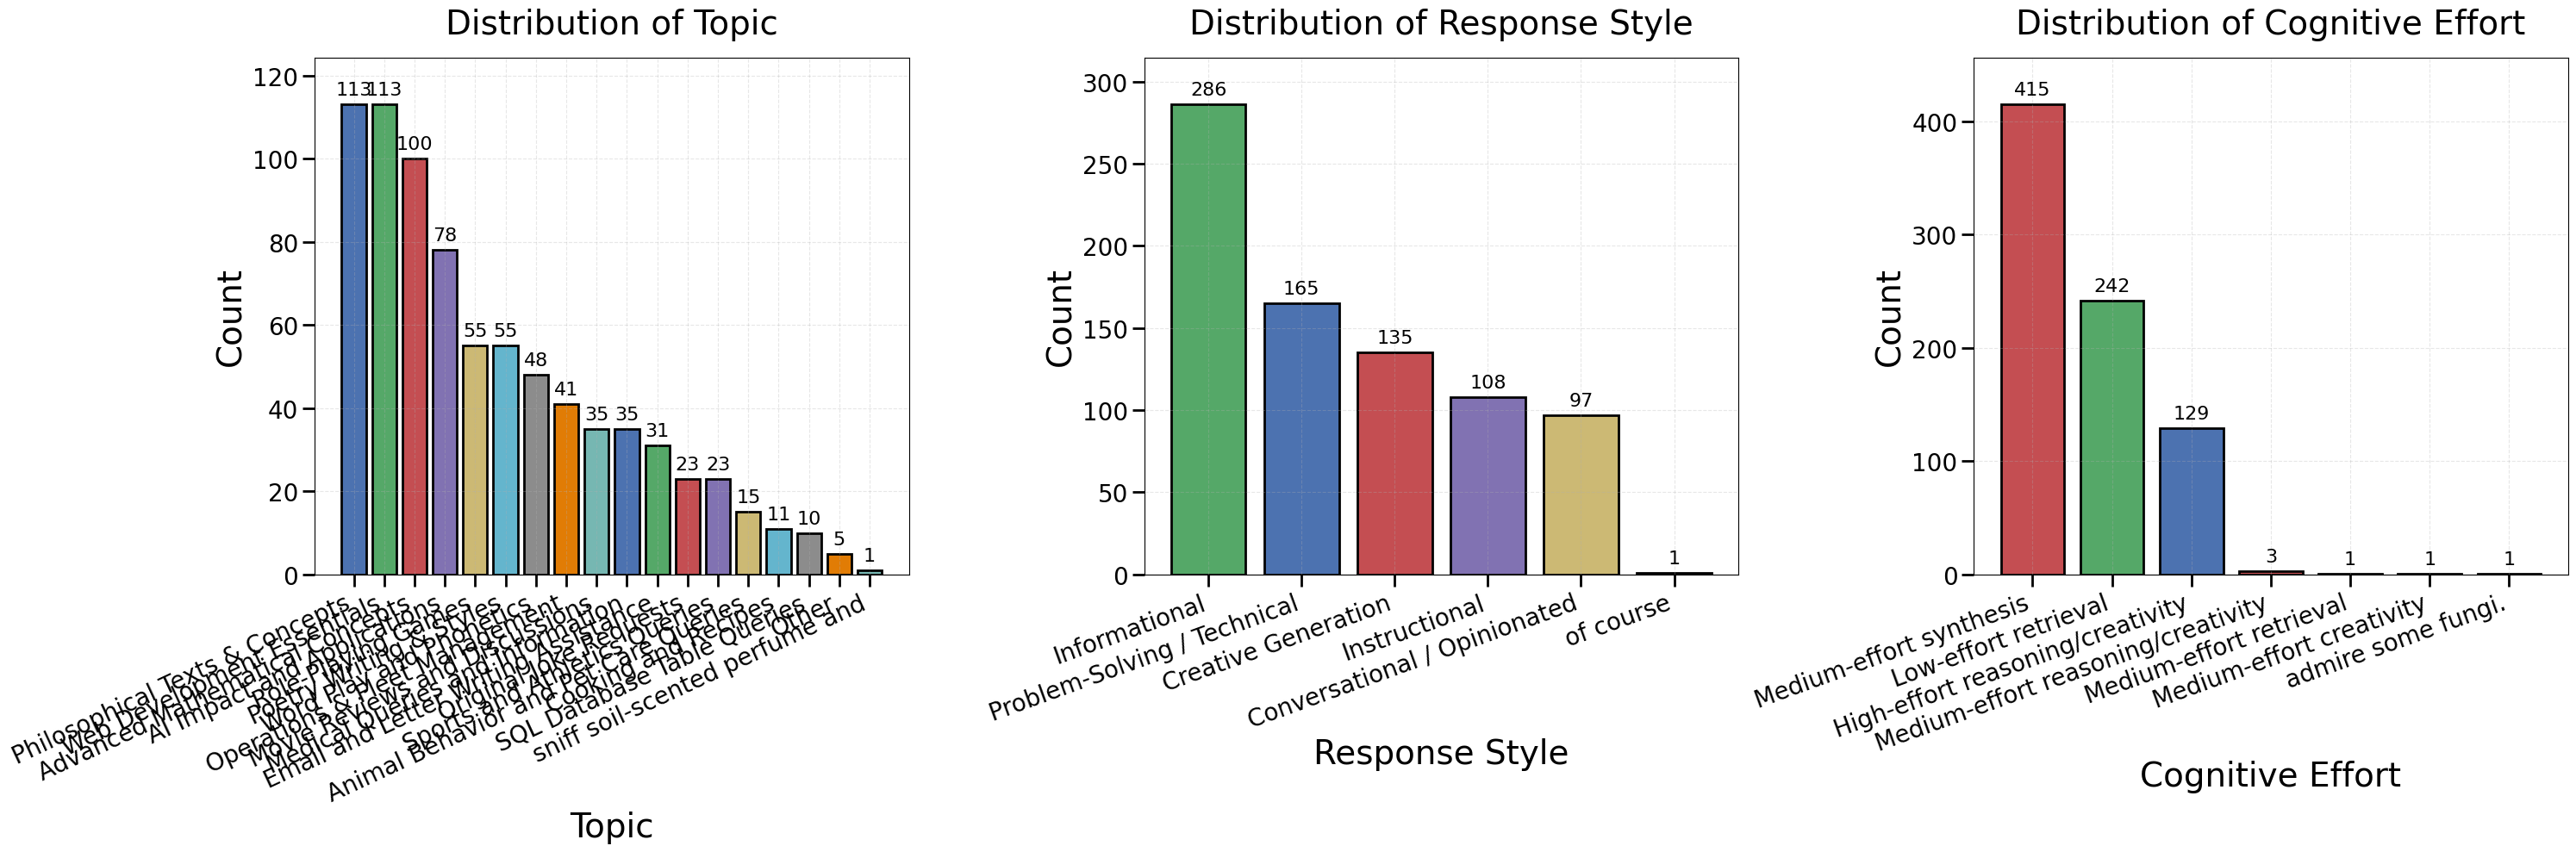

In [23]:
import matplotlib.pyplot as plt

# Set font sizes for clarity
label_fontsize = 28
tick_fontsize = 20
title_fontsize = 28
annot_fontsize = 16

# Custom color palettes for each attribute
topic_colors = [
    "#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974", "#64B5CD", "#8C8C8C", "#E17C05", "#76B7B2"
]
response_style_colors = [
    "#55A868", "#4C72B0", "#C44E52", "#8172B2", "#CCB974"
]
cognitive_effort_colors = [
    "#C44E52", "#55A868", "#4C72B0"
]

# --- Value counts for each attribute ---
topic_counts = chat_prompts_classified_filtered['topic'].value_counts()
topic_labels = topic_counts.index.tolist()
topic_values = topic_counts.values

response_style_counts = chat_prompts_classified_filtered['response_style'].value_counts()
response_style_labels = response_style_counts.index.tolist()
response_style_values = response_style_counts.values

cognitive_effort_counts = chat_prompts_classified_filtered['cognitive_effort'].value_counts()
cognitive_effort_labels = cognitive_effort_counts.index.tolist()
cognitive_effort_values = cognitive_effort_counts.values

fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# --- Topic Distribution ---
ax = axes[0]
bars = ax.bar(
    range(len(topic_labels)),
    topic_values,
    color=topic_colors[:len(topic_labels)],
    edgecolor='black',
    linewidth=2
)
ax.set_xlabel('Topic', fontsize=label_fontsize)
ax.set_ylabel('Count', fontsize=label_fontsize)
ax.set_xticks(range(len(topic_labels)))
ax.set_xticklabels(topic_labels, fontsize=tick_fontsize, rotation=25, ha="right")
ax.set_ylim(0, max(topic_values) * 1.10)
ax.set_title('Distribution of Topic', fontsize=title_fontsize, pad=20)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize, length=10, width=2)
ax.grid(True, which='both', linestyle='--', alpha=0.3)
for bar, value in zip(bars, topic_values):
    ax.annotate(f"{value}", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=annot_fontsize)

# --- Response Style Distribution ---
ax = axes[1]
bars = ax.bar(
    range(len(response_style_labels)),
    response_style_values,
    color=response_style_colors[:len(response_style_labels)],
    edgecolor='black',
    linewidth=2
)
ax.set_xlabel('Response Style', fontsize=label_fontsize)
ax.set_ylabel('Count', fontsize=label_fontsize)
ax.set_xticks(range(len(response_style_labels)))
ax.set_xticklabels(response_style_labels, fontsize=tick_fontsize, rotation=20, ha="right")
ax.set_ylim(0, max(response_style_values) * 1.10)
ax.set_title('Distribution of Response Style', fontsize=title_fontsize, pad=20)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize, length=10, width=2)
ax.grid(True, which='both', linestyle='--', alpha=0.3)
for bar, value in zip(bars, response_style_values):
    ax.annotate(f"{value}", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=annot_fontsize)

# --- Cognitive Effort Distribution ---
ax = axes[2]
bars = ax.bar(
    range(len(cognitive_effort_labels)),
    cognitive_effort_values,
    color=cognitive_effort_colors[:len(cognitive_effort_labels)],
    edgecolor='black',
    linewidth=2
)
ax.set_xlabel('Cognitive Effort', fontsize=label_fontsize)
ax.set_ylabel('Count', fontsize=label_fontsize)
ax.set_xticks(range(len(cognitive_effort_labels)))
ax.set_xticklabels(cognitive_effort_labels, fontsize=tick_fontsize, rotation=20, ha="right")
ax.set_ylim(0, max(cognitive_effort_values) * 1.10)
ax.set_title('Distribution of Cognitive Effort', fontsize=title_fontsize, pad=20)
ax.tick_params(axis='both', which='major', labelsize=tick_fontsize, length=10, width=2)
ax.grid(True, which='both', linestyle='--', alpha=0.3)
for bar, value in zip(bars, cognitive_effort_values):
    ax.annotate(f"{value}", xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 5), textcoords="offset points", ha='center', va='bottom', fontsize=annot_fontsize)

plt.tight_layout()
plt.show()

# Load in chat data.

In [3]:
from datasets import load_dataset

# Load the lmsys/chatbot_arena_conversations dataset from HuggingFace
chat_data = load_dataset("lmarena-ai/arena-human-preference-55k", split="train")

/dccstor/tool_use/model_serve_new/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# HuggingFace datasets.Dataset doesn't have .head(), so use .select or .to_pandas()
# Show first 5 rows as a DataFrame
chat_data_df = chat_data.to_pandas()
chat_data_df.shape

(57477, 9)

In [5]:
chat_data_df['prompt']

0        ["Is it morally right to try to have a certain...
1        ["What is the difference between marriage lice...
2        ["explain function calling. how would you call...
3        ["How can I create a test set for a very rare ...
4        ["What is the best way to travel from Tel-Aviv...
                               ...                        
57472    ["A simple mnemonic for \u03c0:\n\"How I wish ...
57473    ["In python, implement a naive Bayes with gaus...
57474    ["is it unethical to work on building weapons?...
57475    ["If a bait contains 0,0025% bromadiolon then ...
57476    ["three kids eat three apples in three days, h...
Name: prompt, Length: 57477, dtype: object

In [10]:
# Save the first 1000 prompts to a CSV file
chat_prompts = chat_data_df['prompt'].head(1000)
chat_prompts.to_csv("chat_prompts.csv", index=True)


In [87]:
chat_prompts = pd.read_csv("/dccstor/gma2/mehuldamani/search-and-learn/cluster-questions/chat_prompts.csv", index_col=0)

In [88]:
# Rename 'prompt' column to 'question' and add a 'question_id' column as the first column
chat_questions = chat_prompts.rename(columns={'prompt': 'question'}).copy()
chat_questions.insert(0, 'question_id', chat_questions.index)
chat_questions.head()

,question_id,question
0,0,"[""Is it morally right to try to have a certain..."
1,1,"[""What is the difference between marriage lice..."
2,2,"[""explain function calling. how would you call..."
3,3,"[""How can I create a test set for a very rare ..."
4,4,"[""What is the best way to travel from Tel-Aviv..."


In [89]:
chat_questions = chat_questions.reset_index(drop=True)
chat_questions

,question_id,question
0,0,"[""Is it morally right to try to have a certain..."
1,1,"[""What is the difference between marriage lice..."
2,2,"[""explain function calling. how would you call..."
3,3,"[""How can I create a test set for a very rare ..."
4,4,"[""What is the best way to travel from Tel-Aviv..."
...,...,...
995,995,"[""Compare modern concept of gender identity to..."
996,996,"[""how do you do?""]"
997,997,"[""Implement a h264 video decoder in pure Rust...."
998,998,"[""Write these subsections in a master's thesis..."


In [90]:
chat_questions.head()

,question_id,question
0,0,"[""Is it morally right to try to have a certain..."
1,1,"[""What is the difference between marriage lice..."
2,2,"[""explain function calling. how would you call..."
3,3,"[""How can I create a test set for a very rare ..."
4,4,"[""What is the best way to travel from Tel-Aviv..."


In [9]:
# save chat_questions
# chat_questions.to_csv("chat_questions.csv", index=False)
# read in chat_questions
chat_questions = pd.read_csv("/dccstor/gma2/mehuldamani/search-and-learn/cluster-questions/chat_questions.csv")
chat_questions.head()


,question_id,question
0,0,Is it morally right to try to have a certain p...
1,1,What is the difference between marriage licens...
2,2,explain function calling. how would you call a...
3,3,How can I create a test set for a very rare ca...
4,4,What is the best way to travel from Tel-Aviv t...


In [72]:
# Drop the index column and rename 'question_id.1' to 'question_id'
chat_prompts_sample_reset = chat_prompts_sample.reset_index(drop=True).rename(columns={'question_id.1': 'question_id'})
chat_prompts_sample_reset.head(10)

,question,question_id
0,Is it morally right to try to have a certain p...,0
1,What is the difference between marriage licens...,1
2,explain function calling. how would you call a...,2
3,How can I create a test set for a very rare ca...,3
4,What is the best way to travel from Tel-Aviv t...,4
5,"Construct a rap battle, in the style of Epic R...",5
6,Why water is not used in bath tub?,6
7,"\""Bacteria is life on Mars but a heartbeat isn...",7
8,translate to russian the followig sentence Bi...,8
9,"From now, you *always* have to talk as if you ...",9


In [73]:
chat_prompts_sample_reset.to_csv("chat_prompts_sample.csv", index=False)

In [14]:
import pandas as pd

with open("/dccstor/gma2/mehuldamani/search-and-learn/debug_batch_3_raw_response.txt", "r") as f:
    debug_batch_2_raw_response_text = f.read()
print(debug_batch_2_raw_response_text)

question_id,question,topic,response_style,cognitive_effort
40,"The following is a command that the user is about to run in bash. Please determine if the command is safe to use. Only respond with YES or NO.\nCommand: ls -la\nSafe:",Web Development Essentials,Problem-Solving / Technical,Low-effort retrieval
41,"Today I have three apples. Yesterday I ate one apple. How many apples do I have today?",Advanced Mathematical Concepts,Informational,Low-effort retrieval
42,"Explain why we can't achieve nuclear fusion for energy supply",Advanced Mathematical Concepts,Informational,Medium-effort synthesis
43,"Which is better to visit, Anguilla or Saba?",Movie Reviews and Discussions,Conversational / Opinionated,Medium-effort synthesis
44,"Which of the following metals has the lowest melting point?\nQuestion 3 options:\n\nNb\n\nRu\n\nMo\n\nTc\n\nCd",Advanced Mathematical Concepts,Informational,Low-effort retrieval
45,"write the lyrics to a rap song about some dude called \"phogos\",",Poetry Writing

In [15]:
chat_questions.iloc[55]

question_id                                                   55
question       what is the most beautiful town or city near m...
Name: 55, dtype: object

Prompts with categories.

In [35]:
# Read in the classified prompts file
classified_sample = pd.read_csv("/dccstor/gma2/mehuldamani/search-and-learn/chat_prompts_classified_1.csv", index_col=0)


In [36]:
classified_sample.tail(10)

,question,topic,response_style,cognitive_effort
question_id,,,,
10,write a python function to upload all the file...,Web Development Essentials,Problem-Solving / Technical,Medium-effort synthesis
11,"Can you create a caption using this, thanks? G...",Animal Behavior and Pet Care Queries,Creative Generation,Medium-effort synthesis
12,was the historical jesus a socialist was hitle...,Philosophical Texts & Concepts,Informational,Medium-effort synthesis
13,What's the best first move in tic-tac-toe? Tel...,Role-Playing Games,Informational,Medium-effort synthesis
14,Write me a poem in urdu in the style of Iqbal ...,Poetry Writing & Styles,Creative Generation,High-effort reasoning/creativity
15,what do you know about real estate,Operations & Fleet Management,Informational,Medium-effort synthesis
16,Write a grammatically correct sentence without...,Word Play and Phonetics,Problem-Solving / Technical,High-effort reasoning/creativity
17,how to delete kcptun on server?,Web Development Essentials,Instructional,Medium-effort synthesis
18,"Mary has 6 others siblings named Monday, Tuesd...",Word Play and Phonetics,Problem-Solving / Technical,Low-effort retrieval


In [7]:
# Display a few random samples of prompts and responses to get a sense of the data
import random

# Set a seed for reproducibility
random.seed(42)

# Sample 5 random rows from the DataFrame
sampled_rows = chat_data_df.sample(5)

for idx, row in sampled_rows.iterrows():
    print(f"Prompt:\n{row['prompt']}\n")
    print(f"Response A (model: {row['model_a']}):\n{row['response_a']}\n")
    print(f"Response B (model: {row['model_b']}):\n{row['response_b']}\n")
    print(f"Winner: {'A' if row['winner_model_a'] else ('B' if row['winner_model_b'] else 'Tie')}")
    print("="*80)


Prompt:
["MLP RP. you FS ; me PP ; you first"]

Response A (model: gpt-4-0613):
["*(As Fluttershy)*\n\nIt's a beautiful day in Ponyville. The birds are singing, the sun is shining and the flowers are in full bloom. I'm in my cottage tending to my little animal friends when suddenly, there's a knock on my door. I gently put Angel Bunny down and walk over to the door, opening it with a smile.\n\n\"Oh, hello! It's so nice to see you, Pinkie Pie.\""]

Response B (model: gpt-4-0314):
["Fluttershy gently fluttered beside Pinkie Pie, eagerly awaiting their next adventure. \"So Pinkie Pie, what fun do you have planned for today?\" she asked with a smile."]

Winner: A
Prompt:
["Write a minimal latex template file.","write a php sql insert query"]

Response A (model: wizardlm-13b):
["Here is a minimal LaTeX template file that includes the necessary files for creating a basic LaTeX document:\n```\n\\documentclass{article}\n\\usepackage[utf8]{inputenc}\n\n\\title{My Document}\n\\author{John Doe}\n

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the length of each response_a (number of characters)
response_a_lengths = chat_data_df["response_a"].dropna().apply(lambda x: len(str(x)))

plt.figure(figsize=(10,6))
sns.kdeplot(response_a_lengths, fill=True, color='skyblue')
plt.title("Chatbot Arena: Response Lengths")
plt.xlabel("Length of response (number of characters)")
plt.ylabel("Density")
plt.grid(axis='y', alpha=0.75)
plt.show()


KeyboardInterrupt: 

In [ ]:
# Only keep games where one of the specified models is the winner
target_models = [
    "gpt-4-0125-preview",
    "gpt-4-1106-preview",
    "gpt-4-0314",
    "gpt-4-0613",
    "qwen1.5-73b-chat"
]

# Assuming chat_data_df has a 'winner' column with model names
strong_winners = chat_data_df[
    ((chat_data_df["winner_model_a"] == 1) & (chat_data_df["model_a"].isin(target_models))) |
    ((chat_data_df["winner_model_b"] == 1) & (chat_data_df["model_b"].isin(target_models))) |
    ((chat_data_df["winner_tie"] == 1) & (chat_data_df["model_a"].isin(target_models)) | (chat_data_df["model_b"].isin(target_models)))
]

In [ ]:
# all conversations where the winner is one of the top 5 models. this should, in hopes, provide a good
# signal for what a "good" answer is.
strong_winners.shape # 15242

(15242, 9)